# Multiple Regression 
This notebook contains my final linear regression with three iterations. 

## Libraries & Functions

In [1]:
 #library imports 
import pandas as pd  
import pandasql
import numpy as np  

from statsmodels.formula.api import ols 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm 
import statsmodels.stats.api as sms
import scipy.stats as stats 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from itertools import combinations 

import warnings
warnings.filterwarnings('ignore')  

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns   
import plotly.express as px 
import plotly.graph_objects as go

In [119]:
def lin_reg(outcome, x_cols, df):  
    """Take in: 
    outcome: dependent variable 
    x_cols: independent variable 
    df: dataframe 
    
    Retrun: 
    OLS Summary 
    VIF Scores 
    QQ Plot""" 
    
    #fit model 
    predictors = '+'.join(x_cols) 
    formula = outcome + "~" + predictors 
    model = ols(formula=formula, data=df).fit() 
    
    #vif scores
    X = df[x_cols] 
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  
    
    #qqplot 
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    
    print(model.summary()) 
    print("\n")
    print("Vif Scores:", list(zip(x_cols, vif)))

In [3]:
def train_test(X, y): 
    """takes in: 
    X= independet dataframe features 
    y= dependent dataframe feature
    
    returns: 
    Test Mean Squared Error and Train Mean Squared Error Train & Test
    """
    
    #Step 1 create your train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
    
    #Step 2 apply model to train set
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test) 
    
    #Step 3 calcualte predictions based on train & test sets 
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test 
    
    #Step 4 calcualte training and test residuals 
    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
    
    print('Train Mean Squarred Error:', mse_train)
    print('Test Mean Squarred Error:', mse_test)

In [4]:
def k_fold(X, y): 
    """Takes in X (X_cols) and y(outcome) 
    Returns
    the Cross Validation scores 
    Score Mean
    """
    mse = make_scorer(mean_squared_error)

    cv_5_results = cross_val_score(linreg, X2, y2, cv=5, scoring=mse) 
    print("Cross Val Scores:", cv_5_results)
    print("Mean:", cv_5_results.mean())

## Read In and Preprocess Data

In [5]:
%store -r df

In [6]:
#set this notebooks working df to the variable mr_df
mr_df = df.copy()

In [7]:
mr_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
#set the date column to month 
mr_df = mr_df.drop(['date', "id"], axis=1) 

### Subsetting the Data 
For this linear regression I am going to subset the data to only select houses that are below an 11 in their grade. This housing range is laid out by King County as meeting code but not custom built. This is the range of renovations that my client would be working with. For this project my stake holders are a public private partnership with King County and Habitat for Hummanity. Specifically their program that remodels houses at low interest rate loans for homeowners. Using this sale set my goal is to deterimine market value post renovation. The Notebooks "Linear Regression Trails 1" and "Linear Regression Trials 2" have models in which I used the whole data set if interested. 

In [9]:
#located houses with a grade below 11 (non custom homes)
subset1 = mr_df.loc[mr_df['grade'] < 11]    
#there are 21096 homes that do not have a housing grade that indicated "custom"

Additionally my stake holders will not be able to purchace houses that are above 1M $ I am subsetting the data to reflect only those below this threshold. 

In [10]:
#locate houses below 1M 
subset2 = subset1.loc[subset1['price'] < 1000000.0]  
subset2
#there are 20016 homes below 1 million dollars in this grouping 

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0   0.0          3      7        1180            0.0   
1             0.0   0.0          3      7        2170          400.0   
2             0.0   0.0          3      6         770            0.0   
3             0.0   0.0          5      7        1050          910.0   
4             0.0   0.0          3      8        1680            0.0   
...           ...   ...        ...    ...         ...            ...   
21592         0.0   0.0          3      8        1530            0.0   
21593         0.0   0.0          3      8        2310            0.0   
21594         0.0   0.0          3      7        1020            0.0   
21595         0.0   0.0          3      8        1600            0.0   
21596         0.0   0.0          3      7        1020            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           0.0    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[20016 rows x 19 columns]

#### Identify categorical columns visually

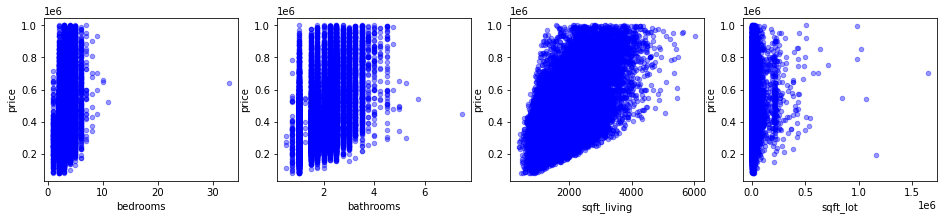

In [11]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

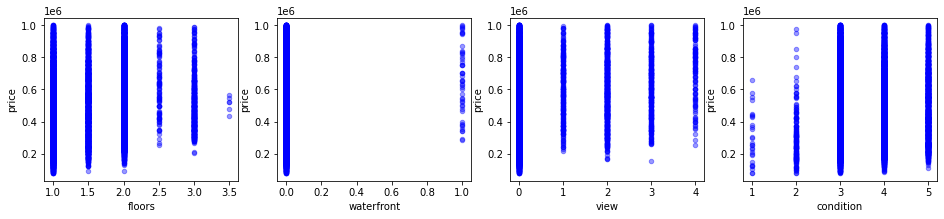

In [12]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['floors', 'waterfront', 'view', 'condition'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b') 
#all of these are categorical

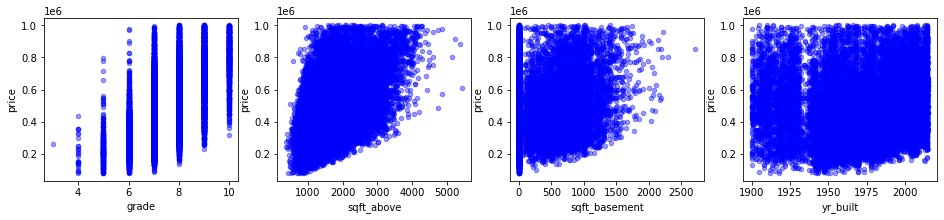

In [13]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'sqft_above', 'sqft_basement', 'yr_built'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')  
#grade is categorical

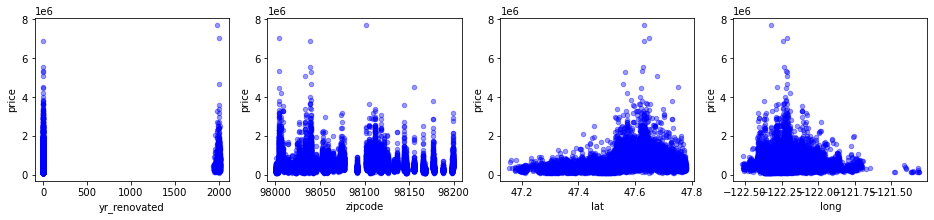

In [14]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_renovated', 'zipcode', 'lat', 'long'], axes):
    mr_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')   
#yr_renovated

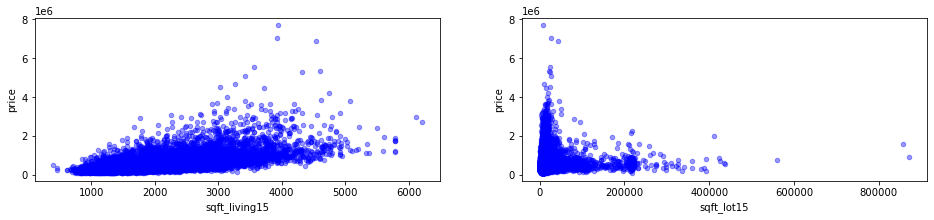

In [15]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['sqft_living15', 'sqft_lot15'], axes):
    mr_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')  

### Shaving the Dataset Based on Problem Statement
From the scatter plots there are several categories that clearly have large outliers. I am going to remove them from this model as they do not represent the normative house. While this will ultimately make my model let acurate on the extremes of the housing market I believe it will allow me to build a more relevant model for the stake holder's purposes. I am also going to be treating the outliers by column individually, in the previously refered to notebooks I took a generalized 3 STD away from the mean approach.

In [16]:
#look at z scores (relationship to the std & mean) 
z = np.abs(stats.zscore(subset2)) 
threshold = 3 #3 std away from them mean 
z_score = subset2[(z<3).all(axis=1)] 
print(np.where(z > 3)) 
z_score

(array([    1,     9,    14, ..., 19971, 19971, 20004], dtype=int64), array([13, 11,  7, ...,  3, 10, 10], dtype=int64))


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
6      257500.0         3       2.25         1715      6819     2.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0   0.0          3      7        1180            0.0   
2             0.0   0.0          3      6         770            0.0   
3             0.0   0.0          5      7        1050          910.0   
4             0.0   0.0          3      8        1680            0.0   
6             0.0   0.0          3      7        1715            0.0   
...           ...   ...        ...    ...         ...            ...   
21592         0.0   0.0          3      8        1530            0.0   
21593         0.0   0.0          3      8        2310            0.0   
21594         0.0   0.0          3      7        1020            0.0   
21595         0.0   0.0          3      8        1600            0.0   
21596         0.0   0.0          3      7        1020            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
2          1933           0.0    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
6          1995           0.0    98003  47.3097 -122.327           2238   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
2            8062  
3            5000  
4            7503  
6            6819  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[17886 rows x 19 columns]

In [17]:
#look at the bedroom values
subset2['bedrooms'].unique()  
#outlier = 33 bedrooms

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [18]:
#locate the 33 bedroom column 
subset2.loc[subset2['bedrooms'] == 33]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15856  640000.0        33       1.75         1620      6000     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
15856         0.0   0.0          5      7        1040          580.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15856      1947           0.0    98103  47.6878 -122.331           1330   

       sqft_lot15  
15856        4700

In [19]:
#uncomment to drop row 
subset2.drop([15856], inplace=True)

In [20]:
#look at the bathroom values
subset2['bathrooms'].unique() 

array([1.  , 2.25, 3.  , 2.  , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  , 3.5 ,
       0.75, 4.25, 1.25, 3.75, 4.5 , 4.75, 5.  , 0.5 , 5.25, 7.5 , 5.75])

7.5 bathrooms, while possible is very high. This number of bathrooms is also only in one home and the next highest number of bathrooms is 5.75, 2 bathrooms less. It's an outliers I am going to drop.

In [21]:
subset2.loc[subset2['bathrooms'] == 7.5]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8537  450000.0         9        7.5         4050      6504     2.0   

      waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
8537         0.0   0.0          3      7        4050            0.0      1996   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
8537           0.0    98144  47.5923 -122.301           1448        3866

In [22]:
#uncomment to drop row
subset2.drop([8537], inplace=True)

In [23]:
subset2.loc[subset2['sqft_living'] < 5000] 
#all but 17 houses fall below the 5000 sqft marker I am going to remove those from the grouping 

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0   0.0          3      7        1180            0.0   
1             0.0   0.0          3      7        2170          400.0   
2             0.0   0.0          3      6         770            0.0   
3             0.0   0.0          5      7        1050          910.0   
4             0.0   0.0          3      8        1680            0.0   
...           ...   ...        ...    ...         ...            ...   
21592         0.0   0.0          3      8        1530            0.0   
21593         0.0   0.0          3      8        2310            0.0   
21594         0.0   0.0          3      7        1020            0.0   
21595         0.0   0.0          3      8        1600            0.0   
21596         0.0   0.0          3      7        1020            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           0.0    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[19997 rows x 19 columns]

In [24]:
subset2.loc[subset2['sqft_living'] > 5000] 

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
577    930000.0         4       4.00         6050     84942     2.5   
1620   610000.0         4       3.25         5450     37058     1.5   
2381   650000.0         5       3.50         5110     10018     2.0   
3228   965000.0         4       3.25         5010     49222     2.0   
3717   884900.0         7       4.75         5370     10800     1.5   
3950   700000.0         4       3.50         5360     25800     1.0   
6622   850000.0         4       2.75         5440    239580     1.0   
7273   800000.0         6       4.25         5480    189050     2.0   
7538   915000.0         4       4.50         5250     48352     2.0   
8188   955000.0         4       4.25         5660    193593     2.0   
8337   452000.0         5       2.50         5067     13315     1.0   
8355   782000.0         4       3.50         5270     53428     2.0   
10968  545000.0         4       2.00         5461     22880     1.0   
12005  936000.0         7       3.75         5100     21802     2.0   
19809  950000.0         5       3.75         5330      6000     2.0   
20280  950000.0         4       4.00         5635      9695     2.0   
20876  790000.0         4       3.00         5370     69848     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
577           0.0   2.0          3      9        4150         1900.0   
1620          0.0   0.0          5      9        5450            0.0   
2381          0.0   0.0          3     10        3850         1260.0   
3228          0.0   0.0          5      9        3710         1300.0   
3717          0.0   0.0          3      8        5370            0.0   
3950          0.0   0.0          3      9        3270         2090.0   
6622          0.0   0.0          2      9        2720         2720.0   
7273          0.0   0.0          4     10        5140          340.0   
7538          0.0   0.0          3     10        5250            0.0   
8188          0.0   0.0          3     10        4100         1560.0   
8337          0.0   2.0          3      9        3154         1913.0   
8355          0.0   0.0          3     10        3440         1830.0   
10968         0.0   0.0          4      9        3265         2196.0   
12005         0.0   0.0          3     10        3640         1460.0   
19809         0.0   2.0          3     10        3570         1760.0   
20280         0.0   3.0          3     10        4360         1275.0   
20876         0.0   0.0          3     10        3500         1870.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
577        2009           0.0    98077  47.7466 -122.029           2700   
1620       1984           0.0    98042  47.3510 -122.087           2800   
2381       2003           0.0    98034  47.7261 -122.170           1790   
3228       1978           0.0    98027  47.5489 -122.092           3140   
3717       1967           0.0    98040  47.5380 -122.223           2310   
3950       1971           0.0    98074  47.6099 -122.054           2650   
6622       1969           0.0    98001  47.3540 -122.293           1970   
7273       1991           0.0    98031  47.4120 -122.168           2470   
7538       1998           0.0    98059  47.4858 -122.111           2500   
8188       2001           0.0    98019  47.7064 -121.981           3620   
8337       1968           0.0    98003  47.3391 -122.325           2860   
8355       2004           0.0    98058  47.4358 -122.085           2340   
10968      1964           0.0    98032  47.3557 -122.290           1940   
12005      2001           0.0    98075  47.5950 -122.040           3350   
19809      2006           0.0    98027  47.5401 -122.073           4420   
20280      2011           0.0    98003  47.3389 -122.334           3726   
20876      2005           0.0    98042  47.3166 -122.046           4443   

       sqft_lot15  
577        199504  
1620        35716  
2381        10018  
322

In [25]:
#uncomment to drop 
subset2.drop([577, 1620, 2381, 3228, 3717, 3950, 6622, 7273, 7538, 8188, 8337, 8355, 10968, 12005, 19809, 20280, 20876], inplace=True)

In [26]:
subset2.loc[subset2["sqft_lot"] > 1000000] 
#there are 4 houses (farms really!) that are more than 1,000,000 sqft these are not the type of homes we will be dealing with

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1717   700000.0         4       1.00         1300   1651359     1.0   
7640   542500.0         5       3.25         3010   1074218     1.5   
7762   855000.0         4       3.50         4030   1024068     2.0   
17305  190000.0         2       1.00          710   1164794     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
1717          0.0   3.0          4      6        1300            0.0   
7640          0.0   0.0          5      8        2010         1000.0   
7762          0.0   0.0          3     10        4030            0.0   
17305         0.0   0.0          2      5         710            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1717       1920           0.0    98022  47.2313 -122.023           2560   
7640       1931           0.0    98027  47.4564 -122.004           2450   
7762       2006           0.0    98045  47.4619 -121.744           1830   
17305      1915           0.0    98014  47.6888 -121.909           1680   

       sqft_lot15  
1717       425581  
7640        68825  
7762        11700  
17305       16730

In [27]:
#uncomment to drop values
subset2.drop([1717, 7640, 7762, 17305], inplace=True)

In [28]:
#located sqft_above above a threshold
subset2.loc[subset2["sqft_above"] > 4500]  
#nost of the homes with more than 4500 swft of living are at the upper threshold price range set, visually this threshold 
#makes sense too 

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
532    970000.0         4       3.25         4740     76230     2.0   
2409   487000.0         6       3.25         4750    248600     2.0   
3268   800000.0         4       2.50         4600     67369     2.0   
4019   960000.0         4       3.50         4610     11676     2.0   
9450   569950.0         5       4.50         4850     40902     2.0   
11871  975000.0         5       4.00         4850     36450     2.0   
16863  750000.0         3       3.25         4610     81935     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
532           0.0   0.0          3     10        4740            0.0   
2409          0.0   0.0          4      8        4750            0.0   
3268          0.0   0.0          3     10        4600            0.0   
4019          0.0   0.0          3     10        4610            0.0   
9450          0.0   0.0          3     10        4850            0.0   
11871         0.0   0.0          3     10        4850            0.0   
16863         0.0   0.0          4      9        4610            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
532        1987           0.0    98075  47.5931 -122.071           3340   
2409       1947           0.0    98022  47.1879 -121.973           2230   
3268       1990           0.0    98053  47.6417 -121.992           4600   
4019       2000           0.0    98075  47.6011 -121.983           3900   
9450       2001           0.0    98023  47.3181 -122.344           1640   
11871      1977           0.0    98005  47.6426 -122.158           3850   
16863      1984           0.0    98074  47.6217 -122.021           2900   

       sqft_lot15  
532         49206  
2409       311610  
3268        67369  
4019        11164  
9450        13503  
11871       35325  
16863       43500

In [29]:
#uncomment to drop values
subset2.drop([532, 2409, 3268, 4019, 9450, 11871, 16863], inplace=True)

In [30]:
#located sqft_basement above a threshold
subset2.loc[subset2["sqft_basement"] > 2200]   
#only 2 values above this threshold

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
14845  805000.0         5       2.50         4600     19831     1.0   
19247  959000.0         6       3.25         4440     17424     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
14845         0.0   3.0          3      9        2300         2300.0   
19247         0.0   1.0          4      9        2220         2220.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
14845      1956        2015.0    98177  47.7608 -122.378           2890   
19247      1959           0.0    98040  47.5791 -122.230           2660   

       sqft_lot15  
14845       19831  
19247       10768

In [31]:
#uncomment to drop values
subset2.drop([14845, 19247], inplace=True)

In [32]:
#located lat above a threshold
subset2.loc[subset2["lat"] > 47.7775]   
#after a visual inspection of a map these properties fall on the far norther edge of the king county border with saconma 
#county

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
306    550000.0         4       2.75         1800      7750     1.0   
15752  407500.0         4       2.50         1900      9075     2.0   
17450  389950.0         3       1.75         1580      9049     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
306           0.0   0.0          4      8        1400          400.0   
15752         0.0   0.0          3      7        1900            0.0   
17450         0.0   0.0          3      8        1580            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
306        1965           0.0    98177  47.7776 -122.384           1800   
15752      1988           0.0    98133  47.7776 -122.352           1800   
17450      1966           0.0    98177  47.7776 -122.375           2100   

       sqft_lot15  
306          8275  
15752        8460  
17450        8446

In [33]:
#uncomment to drop values
subset2.drop([306, 15752, 17450], inplace=True)

In [34]:
#### locate values on far eastern side of county 
subset2.loc[(subset2["long"] > -121.5) & (subset2["long"] < -120)]   

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2587   134000.0         2       1.50          980      5000     2.0   
2925   167000.0         1       1.00          780     10235     1.5   
4199   150000.0         3       0.75          490     38500     1.5   
4844   525000.0         3       2.75         2100     10362     2.0   
5861   175000.0         2       1.75         1050      9800     1.5   
6083   150000.0         3       1.00          890      6488     1.5   
10084  200000.0         2       1.75         1320     13052     1.5   
10886  241000.0         2       1.75         1070      9750     1.5   
13059  155000.0         2       1.00         1010     43056     1.5   
13236  375000.0         3       1.75         2140     13598     1.5   
13981  370000.0         2       2.00         2100     58488     2.0   
14601  160000.0         3       1.00         1340     18552     1.5   
16828  170000.0         1       0.75          850      5600     1.0   
16927  160000.0         3       1.00         1140      3240     1.5   
19634  155000.0         3       1.00         1300      6098     1.0   
19964  415000.0         3       2.75         2600     64626     1.5   
21370  320000.0         3       1.75         1790     66250     1.5   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
2587          0.0   0.0          3      7         980            0.0   
2925          0.0   0.0          3      6         780            0.0   
4199          0.0   0.0          4      5         490            0.0   
4844          0.0   0.0          3      9        1510          590.0   
5861          0.0   0.0          4      6        1050            0.0   
6083          0.0   0.0          3      5         890            0.0   
10084         0.0   0.0          3      7        1320            0.0   
10886         0.0   0.0          3      7        1070            0.0   
13059         0.0   0.0          3      5        1010            0.0   
13236         0.0   0.0          4      7        1620          520.0   
13981         0.0   0.0          3      9        2100            0.0   
14601         0.0   0.0          4      5        1340            0.0   
16828         0.0   2.0          3      6         850            0.0   
16927         0.0   0.0          4      6        1140            0.0   
19634         0.0   0.0          3      7        1300            0.0   
19964         0.0   0.0          3      8        2600            0.0   
21370         0.0   0.0          3      7        1790            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
2587       1922        2003.0    98014  47.7076 -121.359           1040   
2925       1989           0.0    98014  47.7130 -121.315            930   
4199       1959           0.0    98014  47.7112 -121.315            800   
4844       1998           0.0    98045  47.4347 -121.417           2240   
5861       1975           0.0    98019  47.7595 -121.473           1230   
6083       1928           0.0    98014  47.7087 -121.352           1330   
10084      1980           0.0    98014  47.7120 -121.352           1320   
10886      1995           0.0    98014  47.7131 -121.319            970   
13059      1990           0.0    98014  47.7105 -121.316            830   
13236      1970           0.0    98014  47.7139 -121.321            930   
13981      2005           0.0    98014  47.7200 -121.402           1440   
14601      1935           0.0    98014  47.7129 -121.325            960   
16828      1903           0.0    98019  47.7654 -121.480            900   
16927      1910           0.0    98014  47.7093 -121.364           1140   
19634      2013           0.0    98014  47.7074 -121.364           1300   
19964      2009           0.0    98014  47.7185 -121.405           1740   
21370      2003           0.0    98014  47.7179 -121.403           1440   

       sqft_lot15  
2587         5000  
2925        10165  
4199        18297  
484

In [35]:
#uncomment to drop values
subset2.drop([2587, 2925, 4199, 4844, 5861, 6083, 10084, 10886, 13059, 13236, 13981, 14601, 16828, 16927, 19634, 19964, 21370], inplace=True)   

#### Revisualize Data Dispersal

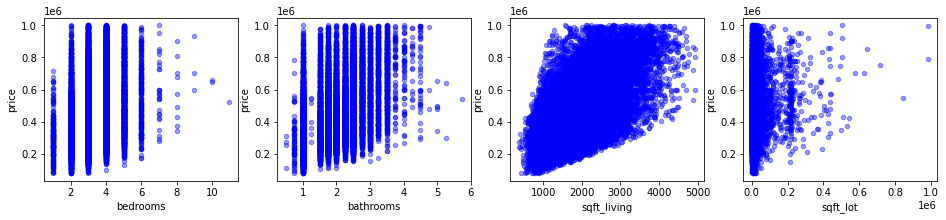

In [36]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

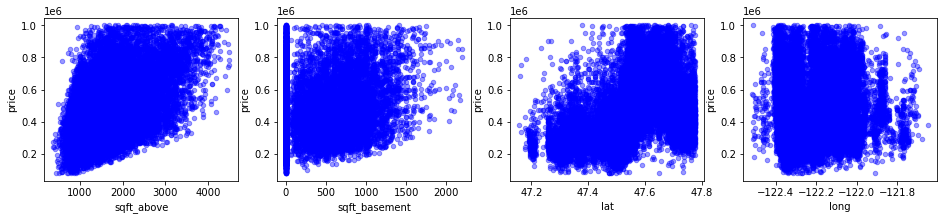

In [37]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_above', 'sqft_basement', 'lat', 'long'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

It looks like there are still som outliers to treat with bedrooms, bathrooms, sqft_lot. I am going to re trim the data in those columns.

#### Resubset Data

In [38]:
#bedrooms above new threshold 
subset2.loc[subset2['bedrooms'] > 4]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
14     530000.0         5       2.00         1810      4850     1.5   
22     285000.0         5       2.50         2270      6300     2.0   
42     861990.0         5       2.75         3595      5639     2.0   
51     345000.0         5       2.50         3150      9134     1.0   
54     920000.0         5       2.25         2730      6000     1.5   
...         ...       ...        ...          ...       ...     ...   
21506  462500.0         6       3.00         2390      4000     2.0   
21544  540000.0         5       2.50         3370      4850     2.0   
21545  750000.0         5       4.00         4500      8130     2.0   
21548  579950.0         5       2.75         3080      5752     2.0   
21580  679950.0         5       2.75         3600      9437     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
14            0.0   0.0          3      7        1810            0.0   
22            0.0   0.0          3      8        2270            0.0   
42            0.0   0.0          3      9        3595            0.0   
51            0.0   0.0          4      8        1640         1510.0   
54            0.0   0.0          3      8        2130          600.0   
...           ...   ...        ...    ...         ...            ...   
21506         0.0   0.0          3      7        2390            0.0   
21544         0.0   0.0          3      9        3370            0.0   
21545         0.0   0.0          3     10        4500            0.0   
21548         0.0   0.0          3      9        3080            0.0   
21580         0.0   0.0          3      9        3600            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
14         1900           0.0    98107  47.6700 -122.394           1360   
22         1995           0.0    98092  47.3266 -122.169           2240   
42         2014           0.0    98053  47.6848 -122.016           3625   
51         1966           0.0    98056  47.4934 -122.189           1990   
54         1927           0.0    98105  47.6571 -122.281           2730   
...         ...           ...      ...      ...      ...            ...   
21506      2014           0.0    98118  47.5173 -122.286           1680   
21544      2007           0.0    98056  47.5078 -122.169           2900   
21545      2007           0.0    98059  47.4832 -122.145           2840   
21548      2014           0.0    98059  47.4922 -122.153           3000   
21580      2014           0.0    98059  47.4822 -122.131           3550   

       sqft_lot15  
14           4850  
22           7005  
42           5639  
51           9133  
54           6000  
...           ...  
21506        5000  
21544        5570  
21545        8402  
21548        4650  
21580        9421  

[1512 rows x 19 columns]

In [39]:
#uncomment to remove  
subset2.drop([11973, 14309, 15827, 16999], inplace=True)

In [40]:
#bedrooms above new threshold 
subset2.loc[subset2['bathrooms'] > 3.25]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
75     832500.0         4        4.0         3430     35102     2.0   
115    740500.0         3        3.5         4380      6350     2.0   
116    518500.0         3        3.5         1590      1102     3.0   
128    822500.0         5        3.5         2320      4960     2.0   
132    784000.0         3        3.5         3950    111078     1.5   
...         ...       ...        ...          ...       ...     ...   
21483  850000.0         5        3.5         4200      5400     2.0   
21487  735000.0         4        3.5         2340      2810     2.0   
21545  750000.0         5        4.0         4500      8130     2.0   
21555  608500.0         4        3.5         2850      5577     2.0   
21557  785000.0         4        3.5         3070      4684     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
75            0.0   0.0          4     10        2390         1040.0   
115           0.0   0.0          3      8        2780            0.0   
116           0.0   0.0          3      8        1590            0.0   
128           0.0   0.0          5      7        1720          600.0   
132           0.0   0.0          3      9        2460         1490.0   
...           ...   ...        ...    ...         ...            ...   
21483         0.0   0.0          3      9        3140         1060.0   
21487         0.0   2.0          3      8        1730          610.0   
21545         0.0   0.0          3     10        4500            0.0   
21555         0.0   0.0          3      8        1950          900.0   
21557         0.0   0.0          3     10        2190          880.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
75         1986           0.0    98075  47.5822 -121.987           3240   
115        1900           0.0    98117  47.6981 -122.368           1830   
116        2010           0.0    98103  47.6824 -122.347           1620   
128        1926           0.0    98103  47.6763 -122.352           1700   
132        1989           0.0    98052  47.6970 -122.072           2480   
...         ...           ...      ...      ...      ...            ...   
21483      2012           0.0    98052  47.7077 -122.120           3300   
21487      2011           0.0    98027  47.5403 -122.028           2600   
21545      2007           0.0    98059  47.4832 -122.145           2840   
21555      2014           0.0    98056  47.5252 -122.192           2850   
21557      2009           0.0    98027  47.5316 -122.076           2290   

       sqft_lot15  
75          35020  
115          6350  
116          3166  
128          4960  
132         88500  
...           ...  
21483        5564  
21487        2843  
21545        8402  
21555        5708  
21557        2664  

[669 rows x 19 columns]

In [41]:
print(subset2["sqft_lot"].mean())
print(subset2["sqft_lot"].median())

14067.842985971944
7490.0


Theres a huge difference between the mean and median of the sqft of these houses I am going to look at what threshold would get those two closer together.

In [42]:
sq_ft_threshold = subset2.loc[subset2['sqft_lot'] < 20000] 

In [43]:
sq_ft_threshold['sqft_lot'].mean()

7288.932102871078

In [44]:
sq_ft_threshold['sqft_lot'].median()

7200.0

Looking at the data I would have to loose over 10,000 rows in order to make the mean and median more even. I am going to log transform the remaining columns instead to preserve those. 

#### Revisualize Data 

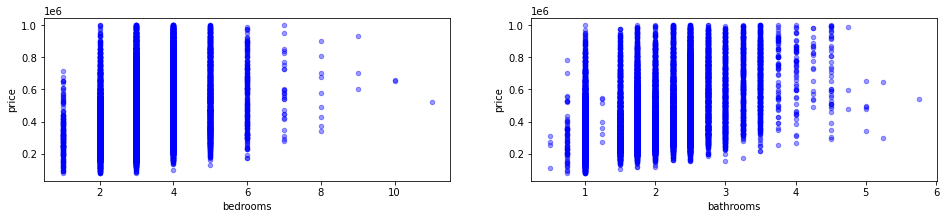

In [45]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

I am still not satisfied with that threshold 

In [46]:
subset2.loc[subset2['bedrooms'] > 8] 
subset2.drop([4092, 4231, 8748, 15147, 18428, 19239], inplace=True)

In [47]:
subset2.loc[subset2['bathrooms'] > 4.5] 
subset2.drop([1434, 1658, 2343, 4594, 5205, 12216, 15737, 16789, 19640, 20968, 21267], inplace=True)

#### Revisualize Data 

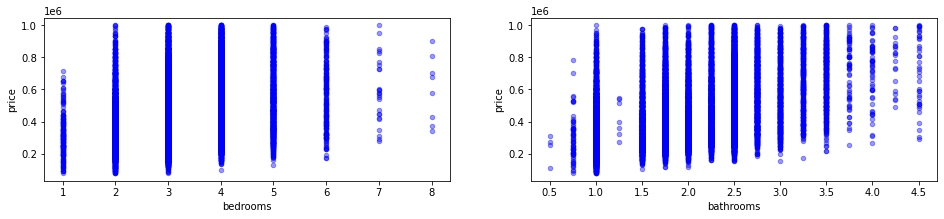

In [48]:
#scatter plot visualization (4 at a time so I can see them!)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms'], axes):
    subset2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

I am not satisfied with the threshold I broke these categories into.

## Feature Engineering

### Categorical Variables

#### Dummify Waterfront 
Create a dummy column that contains 1 & 0.

In [49]:
#create a dummy waterfront
waterfront_dummies = pd.get_dummies(subset2['waterfront'], prefix='wf', drop_first=True)

In [50]:
subset3 = pd.concat([subset2, waterfront_dummies], axis=1)
#if it has a 1 that means there is a waterfront view 

In [51]:
subset3.drop(['waterfront'], axis=1)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0      221900.0         3       1.00         1180      5650     1.0   0.0   
1      538000.0         3       2.25         2570      7242     2.0   0.0   
2      180000.0         2       1.00          770     10000     1.0   0.0   
3      604000.0         4       3.00         1960      5000     1.0   0.0   
4      510000.0         3       2.00         1680      8080     1.0   0.0   
...         ...       ...        ...          ...       ...     ...   ...   
21592  360000.0         3       2.50         1530      1131     3.0   0.0   
21593  400000.0         4       2.50         2310      5813     2.0   0.0   
21594  402101.0         2       0.75         1020      1350     2.0   0.0   
21595  400000.0         3       2.50         1600      2388     2.0   0.0   
21596  325000.0         2       0.75         1020      1076     2.0   0.0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180            0.0      1955           0.0   
1              3      7        2170          400.0      1951        1991.0   
2              3      6         770            0.0      1933           0.0   
3              5      7        1050          910.0      1965           0.0   
4              3      8        1680            0.0      1987           0.0   
...          ...    ...         ...            ...       ...           ...   
21592          3      8        1530            0.0      2009           0.0   
21593          3      8        2310            0.0      2014           0.0   
21594          3      7        1020            0.0      2009           0.0   
21595          3      8        1600            0.0      2004           0.0   
21596          3      7        1020            0.0      2008           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  wf_1.0  
0        98178  47.5112 -122.257           1340        5650       0  
1        98125  47.7210 -122.319           1690        7639       0  
2        98028  47.7379 -122.233           2720        8062       0  
3        98136  47.5208 -122.393           1360        5000       0  
4        98074  47.6168 -122.045           1800        7503       0  
...        ...      ...      ...            ...         ...     ...  
21592    98103  47.6993 -122.346           1530        1509       0  
21593    98146  47.5107 -122.362           1830        7200       0  
21594    98144  47.5944 -122.299           1020        2007       0  
21595    98027  47.5345 -122.069           1410        1287       0  
21596    98144  47.5941 -122.299           1020        1357       0  

[19943 rows x 19 columns]

In [52]:
subset4 = subset3.drop(['waterfront'], axis=1)

In [53]:
subset4['wf_1.0'] = subset4['wf_1.0'].astype(int)

In [54]:
subset4['wf'] = subset4['wf_1.0']

In [55]:
subset5 = subset4.drop(['wf_1.0'], axis=1)

#### Dummify "yr_renovated"  
Only 500 houses have been renovated at all, while it still a helpful metric I am going to dummify the column to represent either the house has been renovated or it has not.

In [56]:
#map a 1 if renovated 0 if not 
subset5['yr_renovated'] = subset5['yr_renovated'].map(lambda x: '1' if x < 1 else '0')

#### Dummify "view"
The view coloumn currently denotes a view rating, I am going to dummify it if it has a view worth noting it will be a 1 otherwise 0

In [57]:
subset5['view'] = subset5['view'].map(lambda x: '1' if x > 1 else '0')

## Feature Scaling & Normalization

#### Bedrooms & Bathrooms 
Since there is such a strong correlation between bedrooms and bathrooms I am going to that the mean. \

In [58]:
#take the sum of bathrooms/bedrooms 
subset5["bed_bath"] = subset5['bedrooms'] + subset5['bathrooms'] 

#### Log Transform

In [59]:
subset5.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'wf', 'bed_bath'],
      dtype='object')

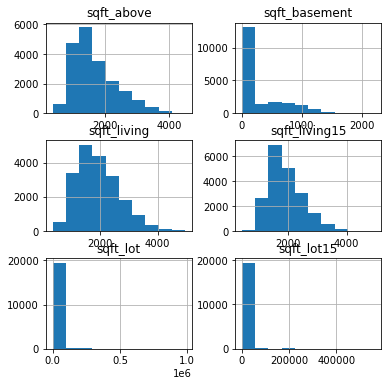

In [60]:
subset5[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].hist(figsize  = [6, 6]); 

Issues with skewness in all of them and variation in magnitude.

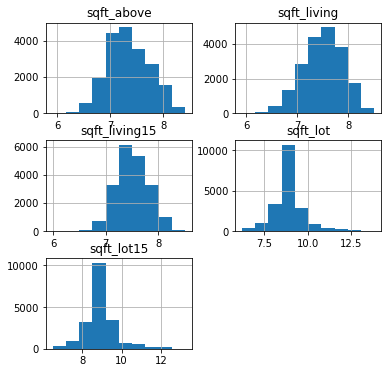

In [61]:
data_log = pd.DataFrame([])
data_log['sqft_living'] = np.log(subset5['sqft_living'])  
data_log['sqft_lot'] = np.log(subset5['sqft_lot']) 
data_log['sqft_above'] = np.log(subset5['sqft_above'])  
data_log['sqft_living15'] = np.log(subset5['sqft_living15']) 
data_log['sqft_lot15'] = np.log(subset5['sqft_lot15'])
data_log.hist(figsize  = [6, 6]);

The log of sqft_basement returned a -int number so I will not log transform that the other columns look better after being transformed.

In [62]:
data_log

sqft_living  sqft_lot  sqft_above  sqft_living15  sqft_lot15
0         7.073270  8.639411    7.073270       7.200425    8.639411
1         7.851661  8.887653    7.682482       7.432484    8.941022
2         6.646391  9.210340    6.646391       7.908387    8.994917
3         7.580700  8.517193    6.956545       7.215240    8.517193
4         7.426549  8.997147    7.426549       7.495542    8.923058
...            ...       ...         ...            ...         ...
21592     7.333023  7.030857    7.333023       7.333023    7.319202
21593     7.745003  8.667852    7.745003       7.512071    8.881836
21594     6.927558  7.207860    6.927558       6.927558    7.604396
21595     7.377759  7.778211    7.377759       7.251345    7.160069
21596     6.927558  6.981006    6.927558       6.927558    7.213032

[19943 rows x 5 columns]

#### Normalize Data

livingnorm   lotnorm  abovenorm  flivingnorm  flotnorm  basementnorm
0       -0.163972 -0.041118  -0.109531    -0.120341 -0.042419     -0.116337
1        0.136378 -0.008214   0.134317    -0.028187  0.002210      0.065481
2       -0.328687  0.034557  -0.280397     0.160799  0.010184     -0.116337
3        0.031825 -0.057317  -0.156252    -0.114458 -0.060503      0.297300
4       -0.027656  0.006299   0.031875    -0.003146 -0.000448     -0.116337
...           ...       ...        ...          ...       ...           ...
21592   -0.063743 -0.254326  -0.005560    -0.067684 -0.237765     -0.116337
21593    0.095223 -0.037348   0.159342     0.003418 -0.006548     -0.116337
21594   -0.220196 -0.230865  -0.167855    -0.228700 -0.195566     -0.116337
21595   -0.046482 -0.155267   0.012346    -0.100120 -0.261312     -0.116337
21596   -0.220196 -0.260933  -0.167855    -0.228700 -0.253475     -0.116337

[19943 rows x 6 columns]

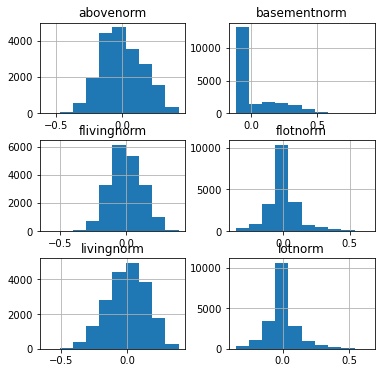

In [63]:
#See how the columns look when normalized
sqft_living_norm = data_log['sqft_living'] 
sqft_lot_norm = data_log['sqft_lot'] 
sqft_lot_above_norm = data_log['sqft_above'] 
sqft_living15_norm = data_log['sqft_living15'] 
sqft_lot15_norm = data_log['sqft_lot15'] 
sqft_basement_norm = subset5["sqft_basement"]

scaled_sqft_living = (sqft_living_norm - np.mean(sqft_living_norm)) / (max(sqft_living_norm) - min(sqft_living_norm)) 
scaled_sqft_lot = (sqft_lot_norm - np.mean(sqft_lot_norm)) / (max(sqft_lot_norm) - min(sqft_lot_norm)) 
scaled_sqft_above = (sqft_lot_above_norm - np.mean(sqft_lot_above_norm)) / (max(sqft_lot_above_norm) - min(sqft_lot_above_norm)) 
scaled_living15 = (sqft_living15_norm - np.mean(sqft_living15_norm)) / (max(sqft_living15_norm) - min(sqft_living15_norm)) 
scaled_lot15 = (sqft_lot15_norm - np.mean(sqft_lot15_norm)) / (max(sqft_lot15_norm) - min(sqft_lot15_norm)) 
scaled_sqft_basement = (sqft_basement_norm - np.mean(sqft_basement_norm)) / (max(sqft_basement_norm) - min(sqft_basement_norm))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['livingnorm'] = scaled_sqft_living 
data_cont_scaled['lotnorm'] = scaled_sqft_lot 
data_cont_scaled['abovenorm'] = scaled_sqft_above  
data_cont_scaled['flivingnorm'] = scaled_living15 
data_cont_scaled['flotnorm'] = scaled_lot15 
data_cont_scaled['basementnorm'] = scaled_sqft_basement

data_cont_scaled.hist(figsize = [6, 6]); 
data_cont_scaled

They all look much better even sqft basement is not as heavy 0. 

#### Min Max Scaling

sqft_livingmm  sqft_lotmm  sqft_abovemm  sqft_living15mm  sqft_lot15mm  \
0           0.447507    0.316200      0.464217         0.481087      0.319741   
1           0.747857    0.349104      0.708065         0.573240      0.364369   
2           0.282792    0.391875      0.293351         0.762227      0.372344   
3           0.643304    0.300001      0.417496         0.486970      0.301657   
4           0.583823    0.363617      0.605623         0.598281      0.361711   
...              ...         ...           ...              ...           ...   
21592       0.547735    0.102992      0.568188         0.533743      0.124394   
21593       0.706701    0.319970      0.733090         0.604845      0.355612   
21594       0.391283    0.126453      0.405893         0.372728      0.166594   
21595       0.564997    0.202051      0.586094         0.501308      0.100848   
21596       0.391283    0.096385      0.405893         0.372728      0.108685   

       sqft_basementmm  
0             0.000000  
1             0.181818  
2             0.000000  
3             0.413636  
4             0.000000  
...                ...  
21592         0.000000  
21593         0.000000  
21594         0.000000  
21595         0.000000  
21596         0.000000  

[19943 rows x 6 columns]

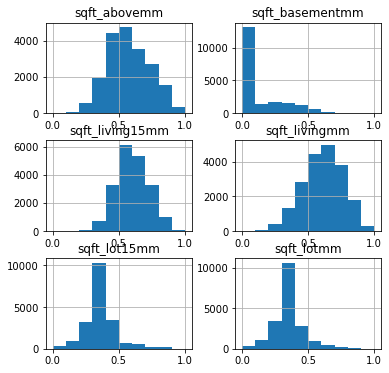

In [64]:
#See how the columns look when min/max scaled
sqft_living_norm = data_log['sqft_living'] 
sqft_lot_norm = data_log['sqft_lot'] 
sqft_lot_above_norm = data_log['sqft_above'] 
sqft_living15_norm = data_log['sqft_living15'] 
sqft_lot15_norm = data_log['sqft_lot15'] 
sqft_basement_norm = subset5["sqft_basement"] 

min_max_living = (sqft_living_norm - min(sqft_living_norm)) / (max(sqft_living_norm) - min(sqft_living_norm))  
min_max_lot = (sqft_lot_norm - min(sqft_lot_norm)) / (max(sqft_lot_norm) - min(sqft_lot_norm)) 
min_max_above = (sqft_lot_above_norm - min(sqft_lot_above_norm)) / (max(sqft_lot_above_norm) - min(sqft_lot_above_norm)) 
min_max_living15 = (sqft_living15_norm - min(sqft_living15_norm)) / (max(sqft_living15_norm) - min(sqft_living15_norm)) 
min_max_lot15 = (sqft_lot15_norm - min(sqft_lot15_norm)) / (max(sqft_lot15_norm) - min(sqft_lot15_norm)) 
min_max_basement = (sqft_basement_norm - min(sqft_basement_norm)) / (max(sqft_basement_norm) - min(sqft_basement_norm))

data_cont_scaled_min_max = pd.DataFrame([])
data_cont_scaled_min_max['sqft_livingmm'] = min_max_living
data_cont_scaled_min_max['sqft_lotmm'] = min_max_lot
data_cont_scaled_min_max['sqft_abovemm'] = min_max_above 
data_cont_scaled_min_max['sqft_living15mm'] = min_max_living15 
data_cont_scaled_min_max['sqft_lot15mm'] = min_max_lot15 
data_cont_scaled_min_max['sqft_basementmm'] = min_max_basement

data_cont_scaled_min_max.hist(figsize = [6, 6]); 
data_cont_scaled_min_max

#### Standardization of the Data

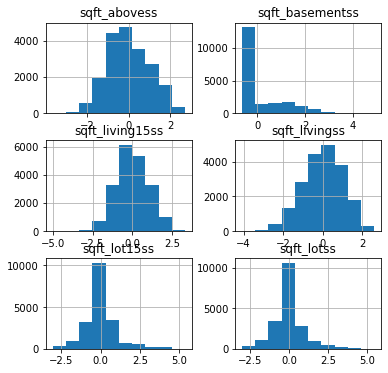

In [65]:
#See how the columns look when standardized scaled
sqft_living_norm = data_log['sqft_living'] 
sqft_lot_norm = data_log['sqft_lot'] 
sqft_lot_above_norm = data_log['sqft_above'] 
sqft_living15_norm = data_log['sqft_living15'] 
sqft_lot15_norm = data_log['sqft_lot15'] 
sqft_basement_norm = subset5["sqft_basement"] 

std_living = (sqft_living_norm - np.mean(sqft_living_norm)) / np.sqrt(np.var(sqft_living_norm)) 
std_lot = (sqft_lot_norm - np.mean(sqft_lot_norm)) / np.sqrt(np.var(sqft_lot_norm)) 
std_above = (sqft_lot_above_norm - np.mean(sqft_lot_above_norm)) / np.sqrt(np.var(sqft_lot_above_norm)) 
std_living15 = (sqft_living15_norm - np.mean(sqft_living15_norm)) / np.sqrt(np.var(sqft_living15_norm)) 
std_lot15 = (sqft_lot15_norm  - np.mean(sqft_lot15_norm)) / np.sqrt(np.var(sqft_lot15_norm )) 
std_basement = (sqft_basement_norm - np.mean(sqft_basement_norm )) / np.sqrt(np.var(sqft_basement_norm))
  

data_cont_scaled_std = pd.DataFrame([])
data_cont_scaled_std['sqft_livingss'] = std_living
data_cont_scaled_std['sqft_lotss'] = std_lot
data_cont_scaled_std['sqft_abovess'] = std_above 
data_cont_scaled_std['sqft_living15ss'] = std_living15 
data_cont_scaled_std['sqft_lot15ss'] = std_lot15 
data_cont_scaled_std['sqft_basementss'] = std_basement

data_cont_scaled_std.hist(figsize = [6, 6]);

In [66]:
subset6 = pd.concat([subset5, data_cont_scaled, data_cont_scaled_std, data_cont_scaled_min_max], axis=1, join='outer')

In [67]:
subset6["view"] = subset6["view"].astype(int)
subset6["yr_renovated"] = subset6["yr_renovated"].astype(int)

## Run Linear Regression

In [68]:
#set the regression to a new df called "mldf"
mldf = subset6.copy()

In [69]:
mldf

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0      221900.0         3       1.00         1180      5650     1.0     0   
1      538000.0         3       2.25         2570      7242     2.0     0   
2      180000.0         2       1.00          770     10000     1.0     0   
3      604000.0         4       3.00         1960      5000     1.0     0   
4      510000.0         3       2.00         1680      8080     1.0     0   
...         ...       ...        ...          ...       ...     ...   ...   
21592  360000.0         3       2.50         1530      1131     3.0     0   
21593  400000.0         4       2.50         2310      5813     2.0     0   
21594  402101.0         2       0.75         1020      1350     2.0     0   
21595  400000.0         3       2.50         1600      2388     2.0     0   
21596  325000.0         2       0.75         1020      1076     2.0     0   

       condition  grade  sqft_above  ...  sqft_abovess  sqft_living15ss  \
0              3      7        1180  ...     -0.692740        -1.002302   
1              3      7        2170  ...      0.849504        -0.234769   
2              3      6         770  ...     -1.773401         1.339277   
3              5      7        1050  ...     -0.988232        -0.953301   
4              3      8        1680  ...      0.201599        -0.026205   
...          ...    ...         ...  ...           ...              ...   
21592          3      8        1530  ...     -0.035165        -0.563735   
21593          3      8        2310  ...      1.007777         0.028466   
21594          3      7        1020  ...     -1.061615        -1.904807   
21595          3      8        1600  ...      0.078085        -0.833884   
21596          3      7        1020  ...     -1.061615        -1.904807   

       sqft_lot15ss  sqft_basementss  sqft_livingmm  sqft_lotmm  sqft_abovemm  \
0         -0.357852        -0.643409       0.447507    0.316200      0.464217   
1          0.018641         0.362150       0.747857    0.349104      0.708065   
2          0.085916        -0.643409       0.282792    0.391875      0.293351   
3         -0.510413         1.644239       0.643304    0.300001      0.417496   
4         -0.003783        -0.643409       0.583823    0.363617      0.605623   
...             ...              ...            ...         ...           ...   
21592     -2.005833        -0.643409       0.547735    0.102992      0.568188   
21593     -0.055239        -0.643409       0.706701    0.319970      0.733090   
21594     -1.649833        -0.643409       0.391283    0.126453      0.405893   
21595     -2.204475        -0.643409       0.564997    0.202051      0.586094   
21596     -2.138363        -0.643409       0.391283    0.096385      0.405893   

       sqft_living15mm  sqft_lot15mm  sqft_basementmm  
0             0.481087      0.319741         0.000000  
1             0.573240      0.364369         0.181818  
2             0.762227      0.372344         0.000000  
3             0.486970      0.301657         0.413636  
4             0.598281      0.361711         0.000000  
...                ...           ...              ...  
21592         0.533743      0.124394         0.000000  
21593         0.604845      0.355612         0.000000  
21594         0.372728      0.166594         0.000000  
21595         0.501308      0.100848         0.000000  
21596         0.372728      0.108685         0.000000  

[19943 rows x 38 columns]

In [70]:
mldf.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'wf', 'bed_bath', 'livingnorm', 'lotnorm', 'abovenorm', 'flivingnorm',
       'flotnorm', 'basementnorm', 'sqft_livingss', 'sqft_lotss',
       'sqft_abovess', 'sqft_living15ss', 'sqft_lot15ss', 'sqft_basementss',
       'sqft_livingmm', 'sqft_lotmm', 'sqft_abovemm', 'sqft_living15mm',
       'sqft_lot15mm', 'sqft_basementmm'],
      dtype='object')

### Investigate Correlation
Look at the current correlations in features.

In [71]:
correlation_df = mldf.corr() 
correlation_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price            1.000000  0.287828   0.431358     0.596095  0.095975   
bedrooms         0.287828  1.000000   0.494979     0.605768  0.021180   
bathrooms        0.431358  0.494979   1.000000     0.705834  0.062242   
sqft_living      0.596095  0.605768   0.705834     1.000000  0.164101   
sqft_lot         0.095975  0.021180   0.062242     0.164101  1.000000   
floors           0.263121  0.152475   0.503046     0.332818 -0.022800   
view             0.194560  0.030596   0.076852     0.139478  0.084500   
condition        0.037048  0.023301  -0.138055    -0.070754 -0.002143   
grade            0.606605  0.323256   0.605100     0.684586  0.095978   
sqft_above       0.502606  0.475762   0.624814     0.843598  0.169131   
sqft_basement    0.218808  0.279239   0.207209     0.365230  0.007665   
yr_built         0.052590  0.169700   0.554984     0.357316  0.050313   
yr_renovated    -0.076992  0.002358  -0.018799    -0.016359 -0.012241   
zipcode         -0.016211 -0.158075  -0.213796    -0.210633 -0.136133   
lat              0.446722 -0.038136  -0.017222     0.001131 -0.104348   
long             0.078952  0.157100   0.259658     0.299110  0.233045   
sqft_living15    0.537697  0.382033   0.518054     0.729765  0.152069   
sqft_lot15       0.075005  0.016199   0.054003     0.162049  0.740948   
wf               0.051305 -0.029434  -0.009466     0.001366  0.030349   
bed_bath         0.405443  0.896230   0.829052     0.750173  0.045406   
livingnorm       0.577514  0.632324   0.723073     0.971547  0.145851   
lotnorm          0.081877  0.173045   0.028779     0.305468  0.672705   
abovenorm        0.490989  0.508789   0.648319     0.832663  0.157656   
flivingnorm      0.525209  0.393712   0.527093     0.716237  0.152150   
flotnorm         0.066449  0.149528   0.023976     0.283259  0.593137   
basementnorm     0.218808  0.279239   0.207209     0.365230  0.007665   
sqft_livingss    0.577514  0.632324   0.723073     0.971547  0.145851   
sqft_lotss       0.081877  0.173045   0.028779     0.305468  0.672705   
sqft_abovess     0.490989  0.508789   0.648319     0.832663  0.157656   
sqft_living15ss  0.525209  0.393712   0.527093     0.716237  0.152150   
sqft_lot15ss     0.066449  0.149528   0.023976     0.283259  0.593137   
sqft_basementss  0.218808  0.279239   0.207209     0.365230  0.007665   
sqft_livingmm    0.577514  0.632324   0.723073     0.971547  0.145851   
sqft_lotmm       0.081877  0.173045   0.028779     0.305468  0.672705   
sqft_abovemm     0.490989  0.508789   0.648319     0.832663  0.157656   
sqft_living15mm  0.525209  0.393712   0.527093     0.716237  0.152150   
sqft_lot15mm     0.066449  0.149528   0.023976     0.283259  0.593137   
sqft_basementmm  0.218808  0.279239   0.207209     0.365230  0.007665   

                   floors      view  condition     grade  sqft_above  ...  \
price            0.263121  0.194560   0.037048  0.606605    0.502606  ...   
bedrooms         0.152475  0.030596   0.023301  0.323256    0.475762  ...   
bathrooms        0.503046  0.076852  -0.138055  0.605100    0.624814  ...   
sqft_living      0.332818  0.139478  -0.070754  0.684586    0.843598  ...   
sqft_lot        -0.022800  0.084500  -0.002143  0.095978    0.169131  ...   
floors           1.000000 -0.016405  -0.278383  0.457189    0.529173  ...   
view            -0.016405  1.000000   0.030713  0.109970    0.049665  ...   
condition       -0.278383  0.030713   1.000000 -0.171382   -0.178753  ...   
grade            0.457189  0.109970  -0.171382  1.000000    0.688721  ...   
sqft_above       0.529173  0.049665  -0.178753  0.688721    1.000000  ...   
sqft_basement   -0.301852  0.165788   0.174030  0.060646   -0.182442  ...   
yr_built         0.515006 -0.063591  -0.349430  0.501534    0.467041  ...   
yr_renovated     0.005724 -0.039824   0.054412  0.018049    0.002838  ...   
zipcode         -0.065860  0.092188  -0.008571 -0.189743   -0.277174  ...   
lat              

In [72]:
#correlation above 0.75 is highly correlated
abs(correlation_df.corr()) > 0.75

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price             True     False      False         True     False   False   
bedrooms         False      True       True         True     False   False   
bathrooms        False      True       True         True     False    True   
sqft_living       True      True       True         True     False   False   
sqft_lot         False     False      False        False      True   False   
floors           False     False       True        False     False    True   
view             False     False      False        False     False   False   
condition        False     False      False        False     False   False   
grade             True     False       True         True     False    True   
sqft_above       False     False       True         True     False    True   
sqft_basement    False     False      False        False     False   False   
yr_built         False     False       True        False     False    True   
yr_renovated     False     False      False        False     False   False   
zipcode          False     False      False        False     False   False   
lat              False     False      False        False     False   False   
long             False     False      False        False     False   False   
sqft_living15    False     False       True         True     False   False   
sqft_lot15       False     False      False        False      True   False   
wf               False     False      False        False     False   False   
bed_bath         False      True       True         True     False   False   
livingnorm        True      True       True         True     False   False   
lotnorm          False     False      False        False      True   False   
abovenorm        False     False       True         True     False    True   
flivingnorm      False     False       True         True     False   False   
flotnorm         False     False      False        False      True   False   
basementnorm     False     False      False        False     False   False   
sqft_livingss     True      True       True         True     False   False   
sqft_lotss       False     False      False        False      True   False   
sqft_abovess     False     False       True         True     False    True   
sqft_living15ss  False     False       True         True     False   False   
sqft_lot15ss     False     False      False        False      True   False   
sqft_basementss  False     False      False        False     False   False   
sqft_livingmm     True      True       True         True     False   False   
sqft_lotmm       False     False      False        False      True   False   
sqft_abovemm     False     False       True         True     False    True   
sqft_living15mm  False     False       True         True     False   False   
sqft_lot15mm     False     False      False        False      True   False   
sqft_basementmm  False     False      False        False     False   False   

                  view  condition  grade  sqft_above  ...  sqft_abovess  \
price            False      False   True       False  ...         False   
bedrooms         False      False  False       False  ...         False   
bathrooms        False      False   True        True  ...          True   
sqft_living      False      False   True        True  ...          True   
sqft_lot         False      False  False       False  ...         False   
floors           False      False   True        True  ...          True   
view              True      False  False       False  ...         False   
condition        False       True  False       False  ...         False   
grade            False      False   True        True  ...          True   
sqft_above       False      False   True        True  ...          True   
sqft_basement    False      False  False       False  ...         False   
yr_built         False      False   True        True  ...          True   

In [73]:
outcome = "price"

In [74]:
#look for correlated columns
columns_correlations = []
columns_non_numeric = []

for column in mldf.drop(columns=[outcome]).columns:
    try:
        corr = np.abs(mldf[column].corr(mldf[outcome]))
        t = (column, corr)
        columns_correlations.append(t)
    except:
        columns_non_numeric.append(column)  
        
correlated_features_above_2 = [t[0] for t in columns_correlations if t[1] >= 0.10]
correlated_features_above_2

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15',
 'bed_bath',
 'livingnorm',
 'abovenorm',
 'flivingnorm',
 'basementnorm',
 'sqft_livingss',
 'sqft_abovess',
 'sqft_living15ss',
 'sqft_basementss',
 'sqft_livingmm',
 'sqft_abovemm',
 'sqft_living15mm',
 'sqft_basementmm']

In [75]:
#look at the weight each feature has on predicting price
df = mldf 

X = df.drop(columns=['price'])
X = pd.get_dummies(X, columns=['grade'], prefix_sep='=')
y = df['price']

model = LinearRegression()
model.fit(X, y)

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting price'
)
fig.show()

### Calculate the baseline  
Initial Regression Model

In [76]:
# Defining the problem
outcome = 'price'
bl = list(mldf.columns)
bl.remove(outcome)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1948.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:07:20   Log-Likelihood:            -2.5932e+05
No. Observations:               19943   AIC:                         5.187e+05
Df Residuals:                   19919   BIC:                         5.189e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4991.4060   6.13e+05     

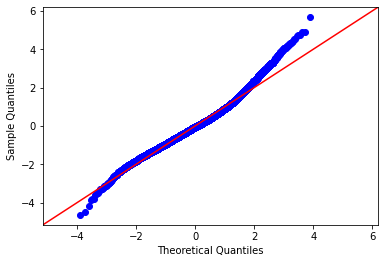

In [77]:
lin_reg(outcome="price", x_cols=bl, df=mldf)

Baseline model has an R2 of 0.692 but has problems with multicollinearity. Using the p score to identiy statistically signifigant results the next round will elimiate those that are above 0.05.

### Trail 2 
Remove uninfluencial factors from the model.

In [78]:
outcome = 'price'
t2 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'sqft_living15', 'sqft_lot15',
       'wf', 'bed_bath']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2695.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:07:27   Log-Likelihood:            -2.5958e+05
No. Observations:               19943   AIC:                         5.192e+05
Df Residuals:                   19926   BIC:                         5.193e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.026e+06   1.64e+06     -3.670

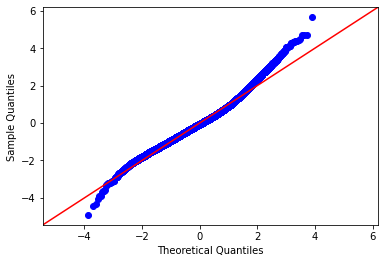

In [79]:
lin_reg(outcome="price", x_cols=t2, df=mldf)

This trial dropped the R2 and sqft above no longer look statistically signifigant. I will remove it and preform another test before removing features based on vif scores.

### Trial 3 
Remove sqft_above

In [80]:
outcome = 'price'
t3 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'yr_built', 'bed_bath',
       'yr_renovated', 'zipcode', 'lat', 'sqft_living15', 'sqft_lot15',
       'wf']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2875.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:07:33   Log-Likelihood:            -2.5958e+05
No. Observations:               19943   AIC:                         5.192e+05
Df Residuals:                   19927   BIC:                         5.193e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.108e+06   1.63e+06     -3.754

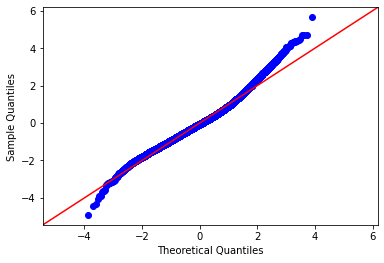

In [81]:
lin_reg(outcome="price", x_cols=t3, df=mldf)

R2 score stayes the same in this trial. I will remove the features who have a vif of over 1,000 next. 

### Trail 4 
Remvoe yr_built, zipcode. While lat has a hight vif score in my initial graph it looked like there was a strong positive correlation between lat and price so I want to see if I can keep that feature in my model. 

In [82]:
outcome = 'price'
t4 = ['bedrooms', 'bathrooms', 'sqft_living', 'bed_bath', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 
       'yr_renovated', 'lat', 'sqft_living15', 'sqft_lot15','wf']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2874.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:07:36   Log-Likelihood:            -2.6054e+05
No. Observations:               19943   AIC:                         5.211e+05
Df Residuals:                   19929   BIC:                         5.212e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.807e+07   2.75e+05   -101.913

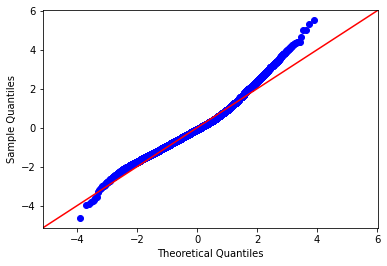

In [83]:
lin_reg(outcome="price", x_cols=t4, df=mldf)

Dropping those features dropped the vif of lat by quite a bit! Normality looks like it is better here at the low end / middle than it is at the high end of the model. Dropping the indvidual bedroom/ bathroom columns is the next logical test.

### Trail 5 
Drop bedroom & bathroom

In [84]:
outcome = 'price'
t5 = ['sqft_living', 'bed_bath', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 
       'yr_renovated', 'lat', 'sqft_living15', 'sqft_lot15','wf']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3114.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:07:38   Log-Likelihood:            -2.6054e+05
No. Observations:               19943   AIC:                         5.211e+05
Df Residuals:                   19930   BIC:                         5.212e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.807e+07   2.75e+05   -101.919

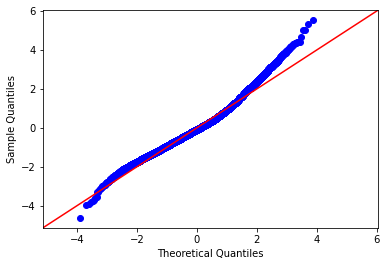

In [85]:
lin_reg(outcome="price", x_cols=t5, df=mldf)

This model has no obviously insignifigant features or intuitively multicolinear features I am going to play around with different features and see how good a R2 score I can get without multicollinearity.

### Trail 6  
Target lat as a feature to keep in a non multicolinear model. Drop condition, yr_renovated, bed_bath, sqft_livingm grade, sqft_living15, floors, sqft_lot15

In [86]:
outcome = 'price'
t6 = ['sqft_lot', 'view', 'lat', 'wf']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     1751.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:07:40   Log-Likelihood:            -2.6806e+05
No. Observations:               19943   AIC:                         5.361e+05
Df Residuals:                   19938   BIC:                         5.362e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.99e+07   3.98e+05    -75.072      0.0

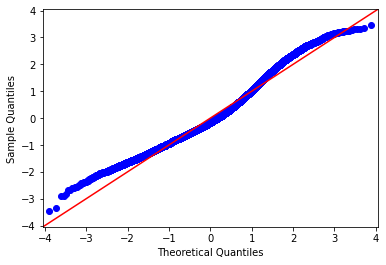

In [87]:
lin_reg(outcome="price", x_cols=t6, df=mldf)

This model has a much better normallity on the high end. The R2 is .260 which is not great and the warnings is still warning of multicolinearity but non of the vif scores are above 2 which is really good. The Durbin- Watson is below 2 which indicates a positive auto correlation. Let's test the mean squared error for this model.

####  Train Test Split & Mean Squared Error

In [88]:
#create a new dataframe containing just target columns
tts1 = mldf.drop(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'long', 'sqft_living15', 'sqft_lot15',
       'bed_bath', 'livingnorm', 'lotnorm', 'abovenorm', 'flivingnorm',
       'flotnorm', 'basementnorm', 'sqft_livingss', 'sqft_lotss',
       'sqft_abovess', 'sqft_living15ss', 'sqft_lot15ss', 'sqft_basementss',
       'sqft_livingmm', 'sqft_lotmm', 'sqft_abovemm', 'sqft_living15mm',
       'sqft_lot15mm', 'sqft_basementmm'], axis=1)

In [89]:
y = tts1[['price']]
X = tts1.drop(['price'], axis=1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [92]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [93]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 27815861804.537693
Test Mean Squarred Error: 27312486451.546104


So this model will allow me to predict the price of the houses within $166,780.88, given some multicollinearity.

### Trail 7  
Target grade as a feature to keep and remove all multicollinearity. Remove bed_bath, sqft_living, lat, sqft_living15, condition, floors, yr_renovated, sqft_lot

In [116]:
outcome = 'price'
t7 = ['view', 'grade', 'sqft_lot15', 'wf']

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     3131.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        07:20:43   Log-Likelihood:            -2.6621e+05
No. Observations:               19943   AIC:                         5.324e+05
Df Residuals:                   19938   BIC:                         5.325e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.162e+05   8285.405    -50.236      0.0

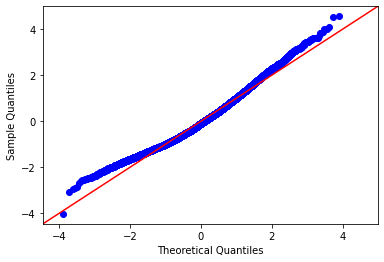

In [120]:
lin_reg(outcome="price", x_cols=t7, df=mldf)

This model has pretty good normality, a little bit off at the low en of the model. The R2 is .386 which is better and the warnings is still warning of multicolinearity but the vif scores are below 2. The Durbin- Watson is below 2 which indicates a positive auto correlation. Let's test the mean squared error for this model. 


####  Train Test Split & Mean Squared Error

In [143]:
#create a new dataframe containing just target columns
tts2 = mldf.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'condition', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
        'bed_bath', 'livingnorm', 'lotnorm', 'abovenorm', 'flivingnorm',
       'flotnorm', 'basementnorm', 'sqft_livingss', 'sqft_lotss',
       'sqft_abovess', 'sqft_living15ss', 'sqft_lot15ss', 'sqft_basementss',
       'sqft_livingmm', 'sqft_lotmm', 'sqft_abovemm', 'sqft_living15mm',
       'sqft_lot15mm', 'sqft_basementmm', 'view', 'wf'], axis=1)

In [144]:
y2 = tts2[['price']]
X2 = tts2.drop(['price'], axis=1)

In [145]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [146]:
linreg = LinearRegression()
linreg.fit(X_train2, y_train2)

y_hat_train2 = linreg.predict(X_train2)
y_hat_test2 = linreg.predict(X_test2)

In [147]:
train_residuals2 = y_hat_train2 - y_train2
test_residuals2 = y_hat_test2 - y_test2

In [148]:
train_mse2 = mean_squared_error(y_train2, y_hat_train2)
test_mse2 = mean_squared_error(y_test2, y_hat_test2)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 27815861804.537693
Test Mean Squarred Error: 27312486451.546104


#### Remove the Y Intercept

In [149]:
import statsmodels.formula.api as smf

In [150]:
tts2

price  grade  sqft_lot15
0      221900.0      7        5650
1      538000.0      7        7639
2      180000.0      6        8062
3      604000.0      7        5000
4      510000.0      8        7503
...         ...    ...         ...
21592  360000.0      8        1509
21593  400000.0      8        7200
21594  402101.0      7        2007
21595  400000.0      8        1287
21596  325000.0      7        1357

[19943 rows x 3 columns]

In [151]:
res3 = smf.ols('y2 ~ X2 -1', data=df).fit() 
print(res3.summary())

                                 OLS Regression Results                                
Dep. Variable:                     y2   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          8.450e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):                        0.00
Time:                        07:35:43   Log-Likelihood:                     -2.6772e+05
No. Observations:               19943   AIC:                                  5.354e+05
Df Residuals:                   19941   BIC:                                  5.355e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Wow so removing the y intercept really improved the Rsquared value of this model!

### Trail 8 
Eliminate features based on high vif scores target no multicollinearity warning. Drop sqft_lotmm, 'bedrooms', 'bathrooms','livingnorm', 'lotnorm', 'abovenorm', 'flivingnorm', 'flotnorm', 'basementnorm', 'sqft_livingmm', 'sqft_abovemm', 'sqft_living15mm', 'sqft_lot15mm', 'sqft_basementmm', 'sqft_living', 'sqft_basementss', 'yr_built','lat', 'grade', 'long', 'zipcode', 'sqft_living15', 'sqft_above', 'bed_bath', 'sqft_abovess', 'yr_renovated','floors', , 'sqft_lot15ss', 'sqft_lot', 'sqft_living15ss', 'sqft_basement',

In [ ]:
outcome = 'price'
t8 = ['view', 'condition', 'wf', 'sqft_lotss']

In [ ]:
lin_reg(outcome="price", x_cols=t8, df=mldf)

This model has a truly terrible R2 0.043 and the QQplot is a lot less normal on the tails than the previous two models.

####  Train Test Split & Mean Squared Error

In [ ]:
#create a new dataframe containing just target columns
tts3 = mldf.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'bed_bath', 'livingnorm', 'lotnorm', 'abovenorm', 'flivingnorm',
       'flotnorm', 'basementnorm', 'sqft_livingss',
       'sqft_abovess', 'sqft_living15ss', 'sqft_lot15ss', 'sqft_basementss',
       'sqft_livingmm', 'sqft_lotmm', 'sqft_abovemm', 'sqft_living15mm',
       'sqft_lot15mm', 'sqft_basementmm'], axis=1)

In [ ]:
y3 = tts3[['price']]
X3 = tts3.drop(['price'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [ ]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

So this model will let me predict within $189,663.86, but has the lowest R2 score by far. The features that were left on this model make sense from a logical point of view, the size, condition, view (waterfront or otherwise) are going to tell a lot about the price of your house. The bigger and nicer it is the more expensive it is. 

## Final Model 

For the purposes of this project I am going to choose the second trial as my final model. I am satisfied with the slight multicollinearity that occurs because the VIF scores are so low and it will predict my price within $151,997.79. Finally I think that for the given buisness problem I outlined the fact that grade is something we can use to predict price is important. If I were to continue modeling this I would look at further feature engineering options that might eliminate the remaining multicollinearity indicated in this model.

## KFold

In [ ]:
mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X2, y2, cv=5, scoring=mse) 
cv_5_results

In [ ]:
cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error')) 

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

These results while very large (not ideal) are all very similar which means that while this is not a good model at least it is a consistent one.

## Visualizations  
Exploring plotly and matplotlib visualizations

### Visualizing Error

In [ ]:
#error as number of trials change
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [ ]:
#errors as sample sizes change
random.seed(900)

train_err = []
test_err = []
t_sizes = range(5,100,5)
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [ ]:
df = mldf 
fig = px.scatter(df, x="sqft_lot15", y="price", facet_col="view", color="sqft_lot15", trendline="ols")
fig.show()

results = px.get_trendline_results(fig)
print(results)

This visual is really interesting and would be another option in future to play around with the affect selecting different features has on your prediction.

In [ ]:
df = mldf
X = mldf.price[:, None]
X_train, X_test, y_train, y_test = train_test_split(X, mldf.sqft_lotss, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

In [ ]:
df = mldf
X = mldf[['sqft_above']]
y = mldf['price']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig = px.scatter(x=y, y=y_pred, labels={'x': 'ground truth', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

In [ ]:
df = mldf
fig = px.scatter(df, x="sqft_living", y="price", color='grade', trendline="ols")
fig.show()

# Conclusion

Landing on a final model to predict price was challenging. For one thing so many of these features are multicollinear it was hard to build a model that didn't have some of that as a factor. Finally so many of my iterations kept coming back to the "bigger and nicer your house is the more expensive it is". Ultimately I was pleased with the final model that I created and picked as it have little multicolinearity, used a feature that was important to my buisness scenario and had an R2 that while very low only resulted in a error of about $150,000. I think that ultimately a different type of model would have been more sucessful due to the high number of multicollinear features. If I were to keep working on this project I would go back to the beginning of my data cleaning and requestion my decisions/ assumptions about the data, I would continue to feature engineer and explore how different variations on normalization, and columns such as bed/bath affected my model.